# Neurons and Layers

We will first learn how to implement layers in using the tensorflow and how they are similar to the classic Linear and Logistic Regression

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError , BinaryCrossentropy
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.activations import sigmoid
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
plt.style.use("ggplot")

## Regression/Linear Model

### First Define some data points and plot that data points

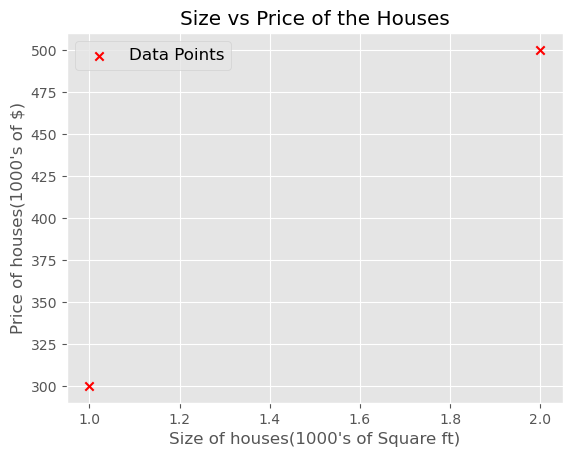

In [3]:
import numpy as np

X_train = np.array([[1.0], [2.0]])
y_train = np.array([[300.0], [500.0]])

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train, y_train, marker="x", c="r", label="Data Points")
ax.set_xlabel("Size of houses(1000's of Square ft)")
ax.set_ylabel("Price of houses(1000's of $)")
ax.set_title("Size vs Price of the Houses")

ax.legend(fontsize="large")
plt.show()

### The formula for predecting the values in Linear Regression was 

$$f_{w, b}(\mathbf{x}^{(i)}) = \mathbf{w}\cdot \mathbf{x}^{(i)} + b$$

We can define a layer with one neuron or unit and compare it to the familiar linear regression function.

In [4]:
linear_layer = Dense(units=1, activation='linear')

In [5]:
linear_layer.get_weights()

[]

Initially the weights of the layer are not defined we have to provide it some data

In [6]:
a1 = linear_layer(X_train[0].reshape(1, 1))

In [7]:
linear_layer.get_weights()

[array([[-0.71259224]], dtype=float32), array([0.], dtype=float32)]

In [8]:
print(a1)

tf.Tensor([[-0.71259224]], shape=(1, 1), dtype=float32)


### Lets set the initiallay known weights for the parameters

In [9]:
w = np.array([[200]])
b = np.array([100])

linear_layer.set_weights([w, b])

In [10]:
linear_layer.get_weights()

[array([[200.]], dtype=float32), array([100.], dtype=float32)]

## Lets predict the values using the Layer as well as Linear prediction model

In [11]:
pred_layer = linear_layer(X_train[0].reshape(1, 1))
pred_linear = np.dot(X_train[0], w) + b

print(pred_layer)
print(pred_linear)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)
[300.]


In [12]:
prediction_layer = linear_layer(X_train)

In [13]:
print(prediction_layer)

tf.Tensor(
[[300.]
 [500.]], shape=(2, 1), dtype=float32)


In [14]:
prediction_linear = X_train @ w + b

In [15]:
print(prediction_linear)

[[300.]
 [500.]]


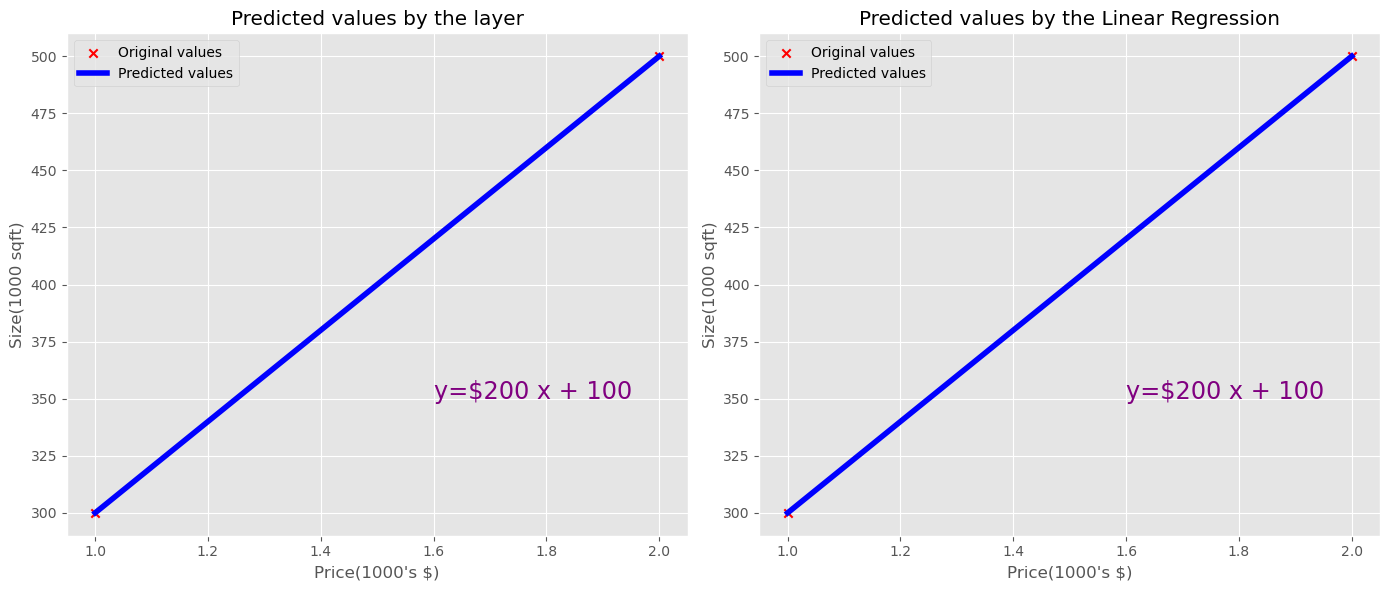

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].scatter(X_train, y_train, marker="x", c="r", label="Original values")
ax[0].plot(X_train, prediction_layer, lw=4, c='b', label='Predicted values')
ax[0].text(1.6, 350, r"y=$200 x + 100", color="purple", fontsize="xx-large")
ax[0].set_title("Predicted values by the layer")
ax[0].set_xlabel("Price(1000's $)")
ax[0].set_ylabel("Size(1000 sqft)")
ax[0].legend()

ax[1].scatter(X_train, y_train, marker="x", c="r", label="Original values")
ax[1].plot(X_train, prediction_linear, lw=4, c='b', label='Predicted values')
ax[1].text(1.6, 350, r"y=$200 x + 100", color="purple", fontsize="xx-large")
ax[1].set_title("Predicted values by the Linear Regression")
ax[1].set_xlabel("Price(1000's $)")
ax[1].set_ylabel("Size(1000 sqft)")
ax[1].legend()

plt.tight_layout()
plt.show()

## Create Neurons with the Sigmoid Activation

Here $$f_{w, b}(x^{(i)}) = g(z)$$

where $$g(z) = \frac{1}{1 + e^{-z}}$$

$$z = w\cdot x^{(i)} + b$$

In [19]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

## Plot the Dataset

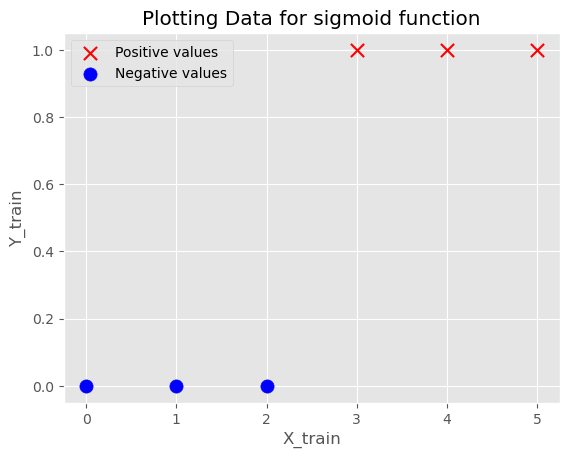

In [20]:
pos = y_train == 1
neg = y_train == 0

fig, ax = plt.subplots(1, 1)
ax.scatter(X_train[pos], y_train[pos], marker="x", color="r", s=90, label="Positive values")
ax.scatter(X_train[neg], y_train[neg], marker="o", color="b", s=90, label="Negative values")
ax.set_title("Plotting Data for sigmoid function")
ax.set_xlabel("X_train")
ax.set_ylabel("Y_train")

ax.legend()
plt.show()

## Create a logistic Neuron using the Sequential function

The sequential function can be used to easily implement various sequential layers in the neural network by using the easy syntax

In [28]:
model = Sequential(
    [
        Dense(units=1, input_dim=1, activation='sigmoid', name="L1")
    ]
)

`model.summary()` shows the layers and number of parameters in the model. There is only one layer in this model and that layer has only one unit. The unit has two parameters, $w$ and $b$.

In [29]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Use model.get_layer('Name of the layer') function to get a specific layer to work on the model

In [32]:
def sigmoidnp(z):
    z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

In [30]:
logistic_layer = model.get_layer("L1")
logistic_layer.get_weights()

[array([[1.4688691]], dtype=float32), array([0.], dtype=float32)]

In [31]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [34]:
prediction_model = model.predict(X_train)
pred_logistic = sigmoidnp(X_train @ set_w + set_b)

1/1 [==============================] - 0s 34ms/step


In [36]:
prediction_model[prediction_model >= 0.5] = 1
prediction_model[prediction_model < 0.5] = 0

pred_logistic[pred_logistic >= 0.5] = 1
pred_logistic[pred_logistic < 0.5] = 0

In [37]:
print(prediction_model)
print(pred_logistic)

[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
[[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


## Plot the predicted data

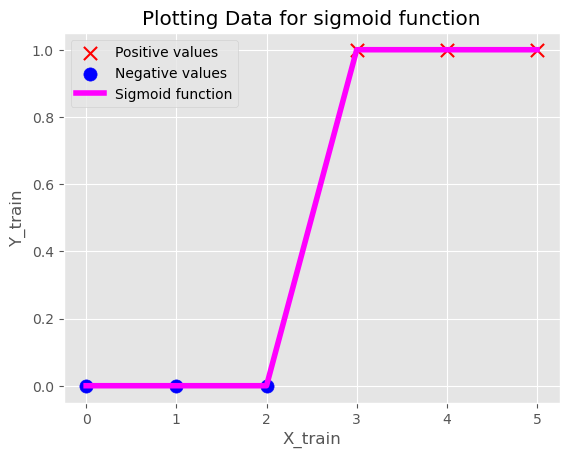

In [42]:
pos = y_train == 1
neg = y_train == 0


fig, ax = plt.subplots(1, 1)
ax.scatter(X_train[pos], pred_logistic[pos], marker="x", color="r", s=90, label="Positive values")
ax.scatter(X_train[neg], pred_logistic[neg], marker="o", color="b", s=90, label="Negative values")
ax.plot(X_train, pred_logistic, lw=4, c="magenta", label="Sigmoid function")
ax.set_title("Plotting Data for sigmoid function")
ax.set_xlabel("X_train")
ax.set_ylabel("Y_train")

# ax.fill()

ax.legend()